# Visualizations

Importing libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

pd.set_option('max_columns',100)
pd.set_option('max_rows',900)

pd.set_option('max_colwidth',200)


df = pd.read_csv("train.csv")

Seperating numerical and categorial columns

In [6]:
numerical = df.select_dtypes(include = "number").columns
cat = df.select_dtypes(include = "object").columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [8]:
 df1 = df.copy()

Encoding categorical data so that model can understand it. Here all the text gets a number as shown below.

In [10]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for x in cat:
    df1[x] = le.fit_transform(df1[x])
    le_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    print(x,le_mapping)

state {'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'IA': 12, 'ID': 13, 'IL': 14, 'IN': 15, 'KS': 16, 'KY': 17, 'LA': 18, 'MA': 19, 'MD': 20, 'ME': 21, 'MI': 22, 'MN': 23, 'MO': 24, 'MS': 25, 'MT': 26, 'NC': 27, 'ND': 28, 'NE': 29, 'NH': 30, 'NJ': 31, 'NM': 32, 'NV': 33, 'NY': 34, 'OH': 35, 'OK': 36, 'OR': 37, 'PA': 38, 'RI': 39, 'SC': 40, 'SD': 41, 'TN': 42, 'TX': 43, 'UT': 44, 'VA': 45, 'VT': 46, 'WA': 47, 'WI': 48, 'WV': 49, 'WY': 50}
area_code {'area_code_408': 0, 'area_code_415': 1, 'area_code_510': 2}
international_plan {'no': 0, 'yes': 1}
voice_mail_plan {'no': 0, 'yes': 1}
churn {'no': 0, 'yes': 1}


Percentage churning based on total number of service calls
Finding - When number of serice calls exceed 4 the chances of churn is more than 44%.

In [14]:
sc=[]
rate=[]
for x in df["number_customer_service_calls"].unique():
    sc.append(x)
    rate.append(df1[df1["number_customer_service_calls"]== x]['churn'].mean()*100)
    
pd.DataFrame(list(zip(sc,rate)), columns=['service calls','churn rate']).sort_values(by=['churn rate'],ascending = False)

,service calls,churn rate
7,9,100.000000
8,6,67.857143
5,5,60.493827
6,7,53.846154
9,8,50.000000
4,4,44.019139
3,3,11.290323
1,0,10.948081
0,1,10.892388
2,2,10.770855


%people churning with an international plan
Findings - If a person has an international plan then he has a probablity of 42.2% of churning.

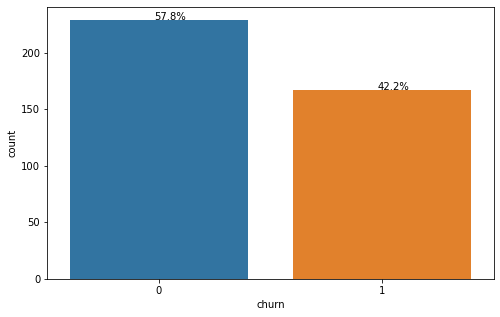

In [16]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df1[df1["international_plan"] == 1],x="churn")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df1[df1["international_plan"]==1]))
    x = p.get_x() + 0.45
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

State wise highest churn rate

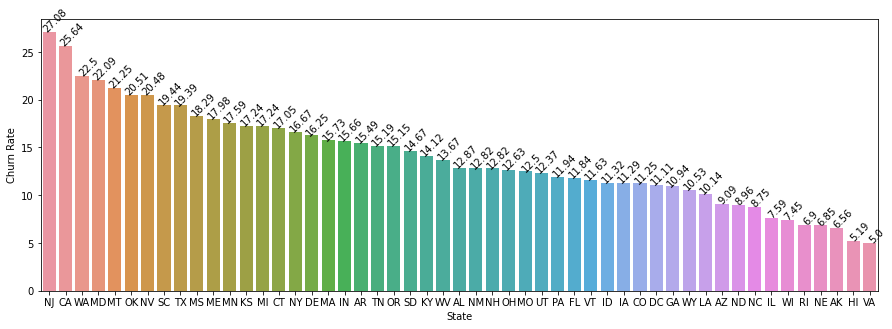

In [18]:
state=[]
percentage_churn=[]
for x in df['state'].unique():
    state.append(x)
    percentage_churn.append((len(df[df['state']==x][df['churn']=='yes'])/len(df[df['state']==x]))*100)
    
state_churnrate = pd.DataFrame(list(zip(state,percentage_churn)),columns=['State','Churn Rate']).sort_values(by=['Churn Rate'],ascending=False)
        
plt.figure(figsize=(15,5))
ax=sns.barplot(data=state_churnrate,x="State",y="Churn Rate")
for p in ax.patches:
    x = p.get_x()+ p.get_width()
    y = p.get_height()
    ax.annotate(round(p.get_height(),2), (x, y),ha='center').set_rotation(45)
plt.show()

In [19]:
df1["total_calls"] = df1["total_day_calls"] + df1["total_eve_calls"] + df1["total_night_calls"]
df1["total_charge"] = df1["total_day_charge"] + df1["total_eve_charge"] + df1["total_night_charge"]
df1["total_minutes"] = df1["total_day_minutes"] + df1["total_eve_minutes"] + df1["total_night_minutes"]

#df1 = df1.drop(['total_day_calls','total_eve_calls','total_night_calls','total_day_charge','total_eve_charge','total_night_charge','total_day_minutes','total_eve_minutes','total_night_minutes'],axis=1)

Number of churned customers vs total charges. Most of the customers churn when they cross a spend between 70 to 80 dollars

Text(0.5, 0, 'total_charge')

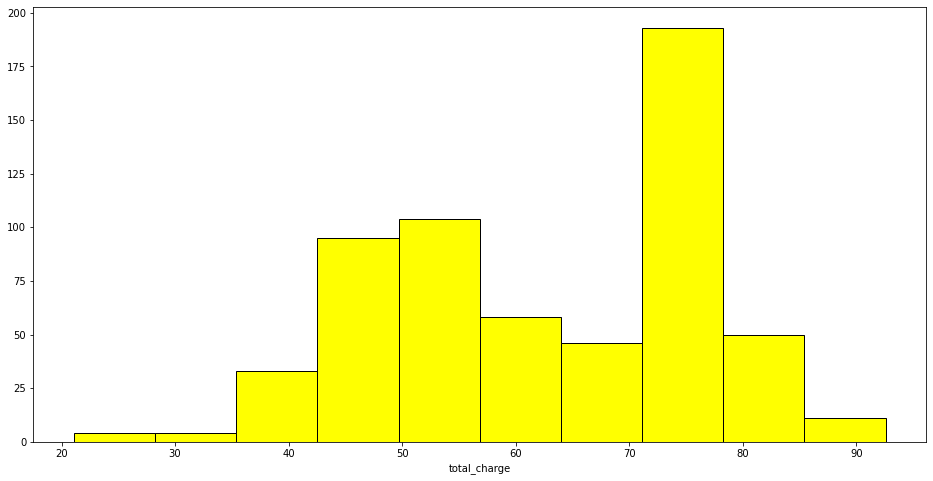

In [42]:
plt.figure(figsize=(16,8))
plt.hist(data=df1[df1["churn"]==1],x="total_charge",linewidth=1.0,edgecolor='black',bins=10,color="yellow")
plt.xlabel("total_charge")

#Majority of churning happens when customer crosses 70 to 80 dollars of talktime charge.